# Visualización I

Hoy realizaremos una serie de gráficas usando la librería de matplotlib para familiarizarnos un poco con los datos.

📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.

Tendréis que realizar gráficas para contestar a las siguientes preguntas:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
visual_ataques = pd.read_csv("../Pandas/ficheros_pandas/attacks1.csv")
visual_ataques.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


1.- ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [13]:
visual_gender = dict(visual_ataques["sex_"].value_counts())
visual_gender

{'M': 4939, 'F': 619, 'M ': 2, 'N': 2, 'lli': 1, '.': 1}

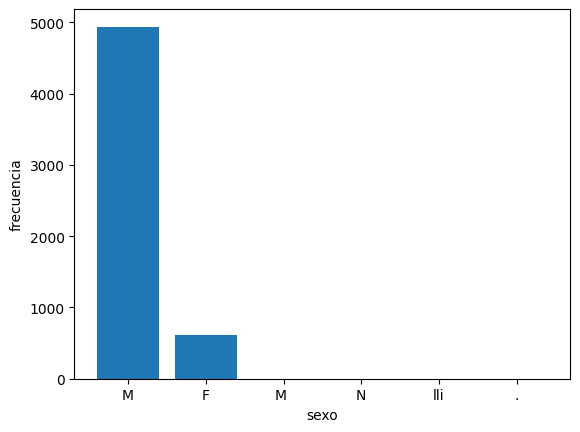

In [14]:
plt.figure()
plt.bar(visual_gender.keys(), visual_gender.values())
plt.xlabel("sexo")
plt.ylabel("frecuencia")
plt.show()

2.- ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación.

In [17]:
visual_nulos = visual_ataques.isnull().sum()
visual_nulos

case_number       1
unnamed:_0        0
year              0
type              4
country          40
area            408
location        488
activity        511
name            200
sex_            550
age            2666
time           3180
species_       2705
href              0
dtype: int64

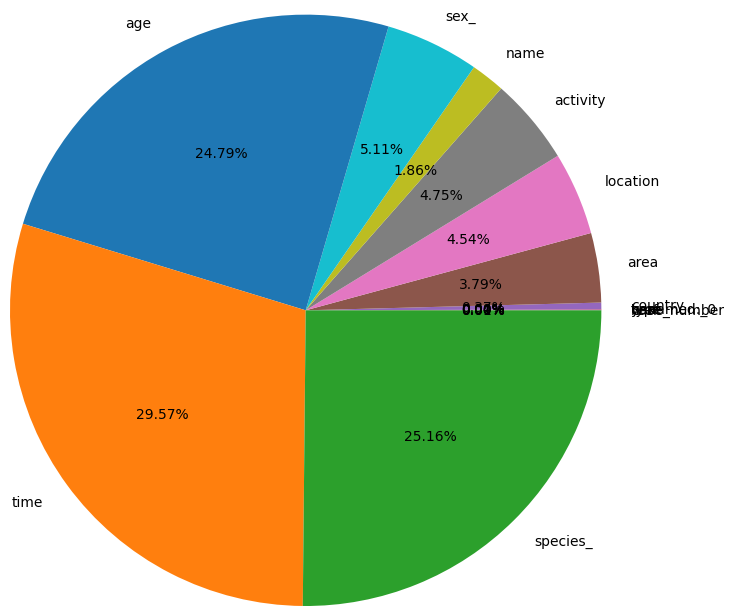

In [23]:
plt.figure()
plt.pie(visual_nulos, labels = visual_ataques.columns, radius = 2, autopct= "%1.2f%%")
plt.show()

3.- ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [40]:
visual_categoricas = visual_ataques.describe(include="object")
visual_categoricas_dic = dict(visual_categoricas.iloc[1,:])
visual_categoricas_dic

{'case_number': 6113,
 'type': 8,
 'country': 201,
 'area': 791,
 'location': 4020,
 'activity': 1484,
 'name': 5118,
 'sex_': 6,
 'age': 156,
 'time': 366,
 'species_': 1529,
 'href': 6099}

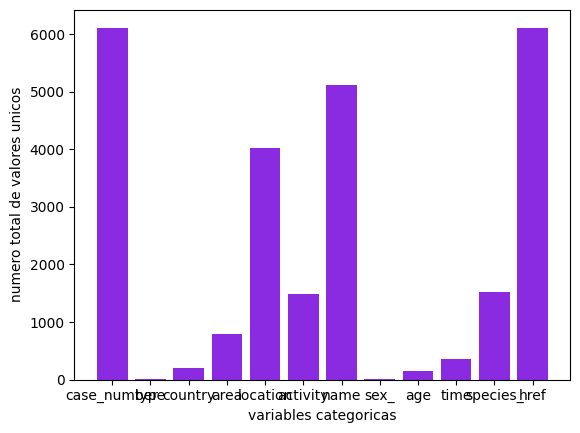

In [48]:
plt.figure()
plt.bar(visual_categoricas_dic.keys(), visual_categoricas_dic.values(), color="blueviolet")
plt.xlabel("variables categoricas")
plt.ylabel("numero total de valores unicos")
plt.show()

4.- Filtrad los datos para quedarnos solo con los datos de USA.

In [49]:
visual_usa = visual_ataques[visual_ataques["country"] == "USA"]
visual_usa.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


.- ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [52]:
condicion1 = visual_usa[visual_usa["year"] >= 2000]
condicion1.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


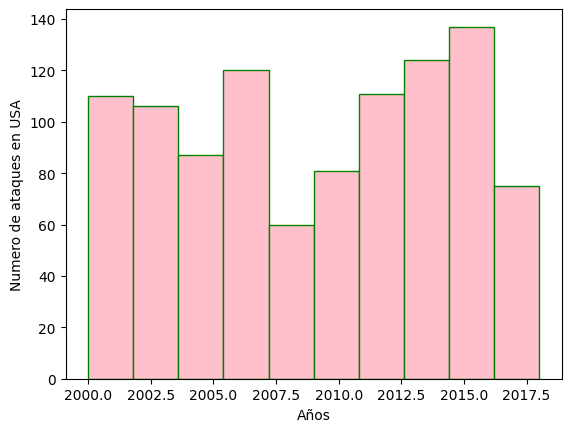

In [56]:
plt.figure()
plt.hist(condicion1["year"], facecolor="pink", edgecolor="green")
plt.xlabel("Años")
plt.ylabel("Numero de ataques en USA")
plt.show()

.- En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

In [80]:
visual_usa["type"].value_counts()
visual_tipo = pd.DataFrame(visual_usa["type"].value_counts())
visual_dict = dict(visual_tipo.iloc[:,0])



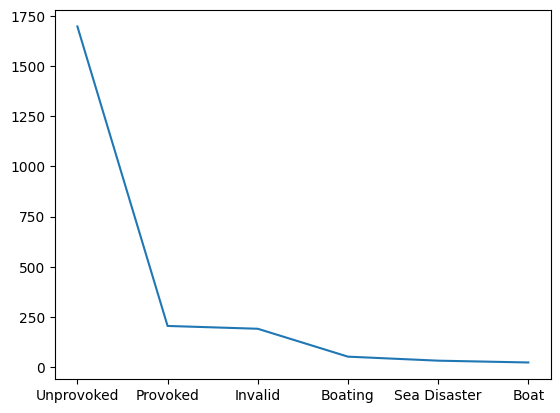

In [79]:
plt.figure()
plt.plot(visual_dict.keys(), visual_dict.values())
plt.show()


5.- Filtrad los datos para Spain:

In [61]:
visual_spain = visual_ataques[visual_ataques["country"] == "SPAIN"]
visual_spain.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
82,2017.09.16.b,82,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...
98,2017.08.26.b,98,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...


.- ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [62]:
condicion2 = visual_spain[visual_spain["year"] >= 2000]
condicion2.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
82,2017.09.16.b,82,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...
98,2017.08.26.b,98,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...


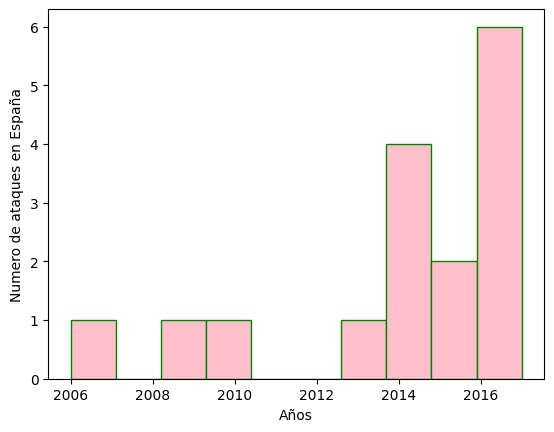

In [63]:
plt.figure()
plt.hist(condicion2["year"], facecolor="pink", edgecolor="green")
plt.xlabel("Años")
plt.ylabel("Numero de ataques en España")
plt.show()

.- En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

In [87]:
visual_spain["type"].value_counts()
visual_tipo_spain = pd.DataFrame(visual_spain["type"].value_counts())
visual_spain_dict = dict(visual_tipo_spain.iloc[:,0])
visual_spain_dict

{'Unprovoked': 26, 'Invalid': 10, 'Provoked': 5, 'Boating': 1}

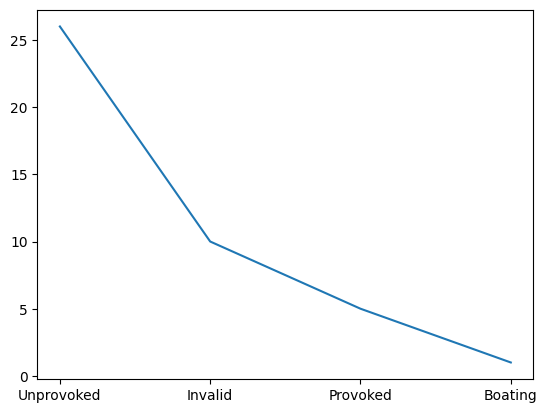

In [88]:
plt.figure()
plt.plot(visual_spain_dict.keys(), visual_spain_dict.values())
plt.show()

Happy coding 🦈